### Imports

In [2]:
import sys
from pathlib import Path
import os, glob
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from collections import defaultdict
import pandas as pd
import shutil
from utils.ymlParser import parse_yml


### Load data attributes into dataframe

Load data attributes into dataframe.  
Makes it easier to select our desired data for viewing  

In [3]:
# data_path = Path('/home/user/hackathon/data')
# test_image_paths = glob.glob('./data/cropped/test/**/*.tif', recursive=True)
# train_image_paths = glob.glob('./data/cropped/train/**/*.tif', recursive=True)

config = parse_yml('./configs/config.yml')
all_image_paths = glob.glob(os.path.join(config.data_dir, 'crops_update/**/*.tif'), recursive=True) #TODO: read path from config

yml file parsed succefully


In [55]:
data_list = []
plants = {'X': 'unknown','1':'cassava', '2':'rice', '3':'maize', '4':'sugarcane'}
for path in all_image_paths:
    # print(path)
    path_parts = path.split('/')
    mode = path_parts[6]
    year = path_parts[7]
    date = path_parts[8]
    sample_id = path_parts[9]
    filename = path_parts[10]
    filepath = path
    filedir = Path(path).parents[0]
    lab = filename.split('_')[0]
    class_name = plants[lab]
    band = filename.split('_')[-1].split('.')[0]
    # print(path_parts)
    # print(mode, year, date, sample_id, filename, filepath, lab)
    
    data_list.append((mode, year, date, sample_id, band, filename, filepath, filedir, class_name, lab))
    

In [56]:
path_parts

['',
 'home',
 'user',
 'hackathon',
 'data',
 'crops_update',
 'train',
 '2020',
 '20200201',
 '779',
 '1_47PQS_20200201_B05.tif']

In [57]:
df = pd.DataFrame(data_list, columns =['mode', 'year', 'date', 'sample_id', 'band', 'filename', 'filepath','filedir', 'class_name', 'lab'])

In [58]:
df.head()

,mode,year,date,sample_id,band,filename,filepath,filedir,class_name,lab
0,test,2021,20210913,49,B11,X_47PQS_20210913_B11.tif,/home/user/hackathon/data/crops_update/test/20...,/home/user/hackathon/data/crops_update/test/20...,unknown,X
1,test,2021,20210913,49,B05,X_47PQS_20210913_B05.tif,/home/user/hackathon/data/crops_update/test/20...,/home/user/hackathon/data/crops_update/test/20...,unknown,X
2,test,2021,20210913,49,TCI,X_47PQS_20210913_TCI.tif,/home/user/hackathon/data/crops_update/test/20...,/home/user/hackathon/data/crops_update/test/20...,unknown,X
3,test,2021,20210913,49,B06,X_47PQS_20210913_B06.tif,/home/user/hackathon/data/crops_update/test/20...,/home/user/hackathon/data/crops_update/test/20...,unknown,X
4,test,2021,20210913,49,B03,X_47PQS_20210913_B03.tif,/home/user/hackathon/data/crops_update/test/20...,/home/user/hackathon/data/crops_update/test/20...,unknown,X


### View all bands

In [59]:
unq_bands = np.sort(df.band.unique())
print(f'number of bands: {len(unq_bands)}')
print(unq_bands)
    


number of bands: 15
['AOT' 'B01' 'B02' 'B03' 'B04' 'B05' 'B06' 'B07' 'B08' 'B11' 'B12' 'B8A'
 'SCL' 'TCI' 'WVP']


### View all classes

In [60]:
dat = np.sort(df.class_name.unique())
print(f'number of classes: {len(dat)}')
print(dat)
    


number of classes: 5
['cassava' 'maize' 'rice' 'sugarcane' 'unknown']


let's inspect the number of samples for each label

In [61]:
val_counts = df[df['band']=='TCI'].class_name.value_counts() #use only 1 band or else each sample gets multiplied with one band
val_counts

unknown      80230
cassava      72420
maize        61486
rice         34080
sugarcane    19028
Name: class_name, dtype: int64

let's plot that

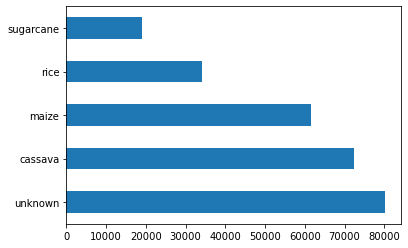

In [62]:

val_counts.plot(kind='barh')
plt.show()

### View number of samples


In [63]:
dat = np.sort(df.sample_id.unique())
print(f'number of samples: {len(dat)}')
print(dat)
    


number of samples: 1317
['0' '1' '10' ... '997' '998' '999']


### Create subset (sample) of data

In [105]:
subset = df[((df['date'].str.contains('202101'))|(df['date'].str.contains('202102')))
            &
            (df['sample_id'].astype(int) < 10)]
print(subset.shape)
subset.head()


(3300, 10)


,mode,year,date,sample_id,band,filename,filepath,filedir,class_name,lab
9135,test,2021,20210225,4,B06,X_47PQS_20210225_B06.tif,/home/user/hackathon/data/crops_update/test/20...,/home/user/hackathon/data/crops_update/test/20...,unknown,X
9136,test,2021,20210225,4,B04,X_47PQS_20210225_B04.tif,/home/user/hackathon/data/crops_update/test/20...,/home/user/hackathon/data/crops_update/test/20...,unknown,X
9137,test,2021,20210225,4,B07,X_47PQS_20210225_B07.tif,/home/user/hackathon/data/crops_update/test/20...,/home/user/hackathon/data/crops_update/test/20...,unknown,X
9138,test,2021,20210225,4,B12,X_47PQS_20210225_B12.tif,/home/user/hackathon/data/crops_update/test/20...,/home/user/hackathon/data/crops_update/test/20...,unknown,X
9139,test,2021,20210225,4,B02,X_47PQS_20210225_B02.tif,/home/user/hackathon/data/crops_update/test/20...,/home/user/hackathon/data/crops_update/test/20...,unknown,X


In [65]:

# for idx, row in subset.iterrows():
#     source_filepath = row.filepath
#     dest_filepath = source_filepath.replace('crops_update', 'crops_update_subset')
#     # print(source_filepath, os.path.basename(dest_filepath))
#     os.makedirs(os.path.dirname(dest_filepath), exist_ok = True) 
#     shutil.copy(source_filepath, dest_filepath)


### Load images and compute indexes

In [106]:
dataset = subset

In [107]:
dataset.iloc[0].filepath

'/home/user/hackathon/data/crops_update/test/2021/20210225/4/X_47PQS_20210225_B06.tif'

In [109]:
NIR.mean()

0.0

In [161]:
import imageio.v3 as iio

def get_stats(imagepath):
    """
    gets an image path and returns its min max and mean
    """
    image = iio.imread(imagepath)#.astype('float64')
    return image, np.min(image), np.max(image), np.mean(image)

def get_indexes_and_stats(G, RED, NIR):
    NDWI = (G-NIR)/(G+NIR)
    NDWI = np.nan_to_num(NDWI)
    NDVI = (NIR-RED)/(NIR+RED)
    NDVI = np.nan_to_num(NDVI)

    results = []
    for index in [NDWI, NDVI]:
        results.append(index)
        results.append(np.min(index))
        results.append(np.max(index))
        results.append(index.mean())
    
    return results

In [162]:
NIR_filepath

'/home/user/hackathon/data/crops_update/train/2021/20210121/3/3_47PQS_20210121_B08.tif'

In [168]:
image_data = []
for index, row in dataset.iterrows():
    # print(row)
    file_dir = Path(row.filepath).parents[0]
    # print(file_dir)
    if file_dir not in image_data:
        this_sample_rows = dataset[dataset['filedir']==file_dir]
        this_sample_rows.head()
        NIR_filepath = this_sample_rows[this_sample_rows['band']=='B08'].filepath.values[0]
        RED_filepath = this_sample_rows[this_sample_rows['band']=='B04'].filepath.values[0]
        G_filepath = this_sample_rows[this_sample_rows['band']=='B03'].filepath.values[0]
        TCI_filepath = this_sample_rows[this_sample_rows['band']=='TCI'].filepath.values[0]
        # NIR_filepath
        
        NIR, NIR_min, NIR_max, NIR_mean = get_stats(NIR_filepath)
        RED, RED_min, RED_max, RED_mean = get_stats(RED_filepath)
        G, G_min, G_max, G_mean = get_stats(G_filepath)
        TCI_min, TCI_max, TCI_mean, _ = get_stats(TCI_filepath)

        NDWI, NDWI_min, NDWI_max, NDWI_mean, NDVI, NDVI_min, NDVI_max, NDVI_mean, = get_indexes_and_stats(G, RED, NIR)
        
        image_data.append({'mode':row.mode,
                           'year':row.year,
                            'name':str(file_dir),
                           'class_name':row.class_name,
                           'lab':row.lab,
                            'NIR_min':NIR_min,
                            'NIR_max':NIR_max,
                            'NIR_mean':NIR_mean,
                            'RED_min':RED_min,
                            'RED_max':RED_max,
                            'RED_mean':RED_mean,
                            'G_min':G_min,
                            'G_max':G_max,
                            'G_mean':G_mean,
                            'TCI_min':TCI_min,
                            'TCI_max':TCI_max,
                            'TCI_mean':TCI_mean,
                            'NDWI_min':NDWI_min,
                            'NDWI_max':NDWI_max,
                            'NDWI_mean':NDWI_mean,
                            'NDVI_min':NDVI_min,
                            'NDVI_max':NDVI_max,
                            'NDVI_mean':NDVI_mean
                               })
        

image_data_df = pd.DataFrame(image_data)
        
        # print(file_dir)
    # NIR = cv2.imread(row.filepath)

/tmp/ipykernel_15420/2455217299.py:11: RuntimeWarning: invalid value encountered in true_divide
  NDWI = (G-NIR)/(G+NIR)
/tmp/ipykernel_15420/2455217299.py:13: RuntimeWarning: invalid value encountered in true_divide
  NDVI = (NIR-RED)/(NIR+RED)


In [170]:
image_data_df.describe()

,NIR_min,NIR_max,NIR_mean,RED_min,RED_max,RED_mean,G_min,G_max,G_mean,TCI_max,TCI_mean,NDWI_min,NDWI_max,NDWI_mean,NDVI_min,NDVI_max,NDVI_mean
count,3300.0,3300.000000,3300.000000,3300.0,3300.000000,3300.000000,3300.0,3300.000000,3300.000000,3300.0,3300.000000,3300.0,3300.000000,3300.000000,3300.0,3300.000000,3300.000000
mean,0.0,155.927273,90.481152,0.0,117.872727,61.189476,0.0,101.413636,54.849442,0.0,-39.768182,0.0,431.849745,218.767516,0.0,38.861721,2.806710
std,0.0,19.327293,25.995642,0.0,26.141746,25.703141,0.0,30.411049,24.304961,0.0,36.634351,0.0,155.749458,72.164606,0.0,122.304100,13.303408
min,0.0,89.000000,29.647059,0.0,66.000000,19.796078,0.0,53.000000,16.054902,0.0,-127.000000,0.0,0.025253,0.010111,0.0,0.013405,0.002929
25%,0.0,144.000000,64.623573,0.0,102.000000,42.642857,0.0,82.000000,37.761187,0.0,-65.000000,0.0,348.343085,182.080718,0.0,0.311282,0.100686
50%,0.0,155.000000,91.406621,0.0,116.000000,57.804258,0.0,96.500000,50.968045,0.0,-40.000000,0.0,403.034310,215.137848,0.0,0.447232,0.160135
75%,0.0,167.000000,112.594017,0.0,133.000000,74.532873,0.0,110.000000,65.195707,0.0,-7.750000,0.0,497.123092,258.436383,0.0,0.621023,0.228228
max,0.0,214.000000,181.700000,0.0,214.000000,183.545455,0.0,216.000000,185.800000,0.0,127.000000,0.0,1598.219512,562.586867,0.0,819.150000,116.228218


### compare samples between classes

In [113]:
samples_class_1 = df[(df['band']=='TCI')&(df['lab']=='1')].iloc[0:5]
samples_class_2 = df[(df['band']=='TCI')&(df['lab']=='2')].iloc[0:5]
samples_class_3 = df[(df['band']=='TCI')&(df['lab']=='3')].iloc[0:5]
samples_class_4 = df[(df['band']=='TCI')&(df['lab']=='4')].iloc[0:5]


In [114]:
def view_sample(row):
    image = cv2.imread(row.filepath)
    plt.figure(figsize=(2, 2))
    plt.imshow(image)
    plt.show()

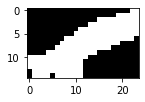

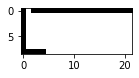

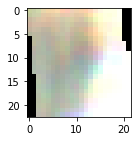

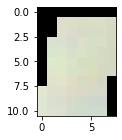

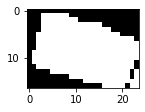

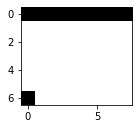

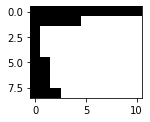

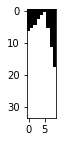

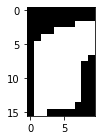

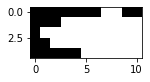

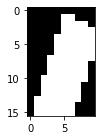

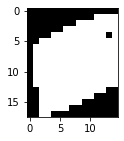

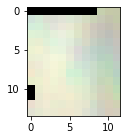

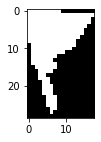

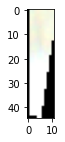

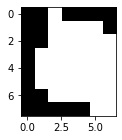

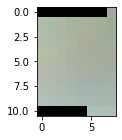

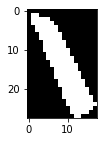

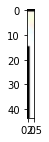

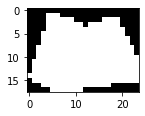

In [115]:
for sample_class in [samples_class_1, samples_class_2, samples_class_3, samples_class_4]:
    for index, row in sample_class.iterrows():
        view_sample(row)
    
    

## Messy code below

In [29]:
#select train/test
modes = os.listdir(os.path.join(data_path, 'cropped'))
print(modes)
mode = 'train'


['test', 'train']


In [36]:
#list down sample names/ids
samples = os.listdir(os.path.join(data_path, 'cropped', mode, '2021', '20210106'))
print(samples[:5])

['1300', '1031', '49', '181', '573']


In [37]:
sample = samples[0]

In [27]:
modes

['test', 'train']

In [10]:
os.path.join(data_path, 'cropped/train/**/*.tif')

'//wsl$/Ubuntu/home/user/hackathon/data/cropped/train/**/*.tif'

In [11]:
os.getcwd()

'/home/user/hackathon'

In [20]:
image = cv2.imread(train_image_paths[4])

In [22]:
image.shape

(16, 10, 3)